# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putra Faaris Prayoga
- **Email:** putrafaariz47@gmail.com
- **ID Dicoding:** putra_faaris

## Menentukan Pertanyaan Bisnis

- Kapan waktu terbaik untuk menyediakan lebih banyak sepeda (dianalisis per musim)?
- Berapa rata-rata pengguna antara hari kerja dan akhir pekan/libur berdasarkan tipe pengguna (casual vs registered)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

## Data Wrangling

### Gathering Data

In [3]:
day = pd.read_csv("data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour = pd.read_csv("data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### **Insight:**

Dataset ini berisi data peminjaman sepeda (bike sharing) dari sistem Capital Bikeshare di Washington D.C., USA selama dua tahun: 2011 dan 2012.

Penjelasan Field Dataset `hour.csv` dan `day.csv`
**Catatan:** Field `hr` hanya tersedia di `hour.csv`
| Field       | Deskripsi                                                                 |
|-------------|---------------------------------------------------------------------------|
| `instant`   | ID atau indeks data                                                       |
| `dteday`    | Tanggal (format YYYY-MM-DD)                                               |
| `season`    | Musim (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)                      |
| `yr`        | Tahun (0 = 2011, 1 = 2012)                                                |
| `mnth`      | Bulan (1 – 12)                                                            |
| `hr`        | Jam dalam hari (0 – 23) **→ hanya ada di `hour.csv`**                     |
| `holiday`   | Apakah hari tersebut hari libur? (1 = Ya, 0 = Bukan)                      |
| `weekday`   | Hari dalam seminggu (0 = Minggu, 1 = Senin, ..., 6 = Sabtu)               |
| `workingday`| Hari kerja (1 = Ya, jika bukan akhir pekan atau hari libur)              |
| `weathersit`| Kondisi cuaca:                                                            |
|             | - 1 = Cerah / sedikit berawan                                             |
|             | - 2 = Berkabut / mendung                                                  |
|             | - 3 = Hujan ringan / badai kecil / salju ringan                           |
|             | - 4 = Hujan deras / badai besar                                            |
| `temp`      | Suhu (dinormalisasi, skala 0–1; nilai asli = temp * 41)                   |
| `atemp`     | Suhu yang dirasakan (dinormalisasi, nilai asli = atemp * 50)             |
| `hum`       | Kelembaban (dinormalisasi, skala 0–1)                                     |
| `windspeed` | Kecepatan angin (dinormalisasi, skala 0–1; max = 67)                     |
| `casual`    | Jumlah peminjam sepeda yang **tidak terdaftar**                          |
| `registered`| Jumlah peminjam sepeda yang **terdaftar**                                |
| `cnt`       | Total jumlah peminjam (casual + registered)                              |


### Assessing Data

#### Struktur Data dan Tipe Kolom

In [5]:
print("=== Struktur dan Tipe Data: hour.csv ===")
print(hour.info(), "\n")

=== Struktur dan Tipe Data: hour.csv ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None 



In [6]:
print("=== Struktur dan Tipe Data: day.csv ===")
print(day.info(), "\n")

=== Struktur dan Tipe Data: day.csv ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 



#### Cek Missing Value dan Duplikasi

In [7]:
print("=== Missing Value: hour.csv ===")
print(hour.isnull().sum(), "\n")

=== Missing Value: hour.csv ===
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



In [8]:
print("=== Missing Value: day.csv ===")
print(day.isnull().sum(), "\n")

=== Missing Value: day.csv ===
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



In [9]:
print("=== Duplikat: hour.csv ===")
print("Jumlah duplikat:", hour.duplicated().sum(), "\n")

=== Duplikat: hour.csv ===
Jumlah duplikat: 0 



In [10]:
print("=== Duplikat: day.csv ===")
print("Jumlah duplikat:", day.duplicated().sum(), "\n")

=== Duplikat: day.csv ===
Jumlah duplikat: 0 



#### Cek Statistika Data

In [11]:
print("=== Statistik Deskriptif: hour.csv ===")
hour.describe()

=== Statistik Deskriptif: hour.csv ===


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
print("=== Statistik Deskriptif: day.csv ===")
day.describe()

=== Statistik Deskriptif: day.csv ===


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Cek Nilai Unique (Nilai Aneh / Tidak Konsisten)

In [13]:
print("=== Data Unique: day.csv ===")
print(day['season'].unique())        # Harusnya 1-4
print(day['weathersit'].unique())    # Harusnya 1-4
print(day['workingday'].unique())    # Harusnya 0 atau 1
print(day['holiday'].unique())       # Harusnya 0 atau 1

=== Data Unique: day.csv ===
[1 2 3 4]
[2 1 3]
[0 1]
[0 1]


In [14]:
print("=== Data Unique: hour.csv ===")
print(hour['season'].unique())        # Harusnya 1-4
print(hour['weathersit'].unique())    # Harusnya 1-4
print(hour['workingday'].unique())    # Harusnya 0 atau 1
print(hour['holiday'].unique())       # Harusnya 0 atau 1

=== Data Unique: hour.csv ===
[1 2 3 4]
[1 2 3 4]
[0 1]
[0 1]


#### **Insight:**

#### Struktur Dataset

**hour.csv**
- Jumlah baris: 17,379
- Jumlah kolom: 17
- Tidak ada missing values atau duplikasi data

**day.csv**
- Jumlah baris: 731
- Jumlah kolom: 16
- Tidak ada missing values atau duplikasi data

---

#### Tipe Data

| Tipe Data | hour.csv | day.csv |
|----------|----------|---------|
| int64    | 12       | 11      |
| float64  | 4        | 4       |
| object   | 1 (dteday) | 1 (dteday) |

> Kolom `dteday` perlu dikonversi ke datetime untuk analisis waktu.

---

#### Statistik Deskriptif - `hour.csv`

**Target variabel (`cnt` - jumlah pengguna per jam):**
- Rata-rata: 189
- Minimum: 1
- Maksimum: 977

**Fitur lain (yang penting):**
- `temp`: rata-rata 0.50 (min: 0.02, max: 0.86) → dikali 41 untuk suhu aktual (≈ 0.82 – 35.3°C)
- `atemp`: rata-rata 0.48 (min: 0.00, max: 0.84) → dikali 50 untuk suhu 'feels-like'
- `hum`: rata-rata 0.63 (min: 0.00, max: 0.97)
- `windspeed`: rata-rata 0.19 (min: 0.00, max: 0.50)
- `casual`: rata-rata 35 (min: 0, max: 367)
- `registered`: rata-rata 154 (min: 0, max: 886)

---

#### Statistik Deskriptif - `day.csv`

**Target variabel (`cnt` - jumlah pengguna per hari):**
- Rata-rata: 4,507
- Minimum: 985
- Maksimum: 8,017

**Fitur lain (yang penting):**
- `temp`: rata-rata 0.50 (min: 0.06, max: 0.86) → dikali 41 untuk suhu aktual (≈ 2.5 – 35.3°C)
- `atemp`: rata-rata 0.48 (min: 0.07, max: 0.84)
- `hum`: rata-rata 0.63 (min: 0.27, max: 0.97)
- `windspeed`: rata-rata 0.19 (min: 0.02, max: 0.43)
- `casual`: rata-rata 848 (min: 2, max: 3,417)
- `registered`: rata-rata 3,599 (min: 20, max: 6,559)

---


### Cleaning Data

#### Perbaikan Kolom dteday

In [15]:
# Ubah kolom 'dteday' menjadi tipe datetime
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [16]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Kembalikan Skala Fitur Normalisasi

In [18]:
day['temp_C'] = day['temp'] * 41
day['atemp_C'] = day['atemp'] * 50  # suhu kenyamanan
day['windspeed_kph'] = day['windspeed'] * 67
day['humidity_pct'] = day['hum'] * 100

In [19]:
hour['temp_C'] = hour['temp'] * 41
hour['atemp_C'] = hour['atemp'] * 50  # suhu kenyamanan (approx.)
hour['windspeed_kph'] = hour['windspeed'] * 67
hour['humidity_pct'] = hour['hum'] * 100

#### Konversi kolom 'season' dari angka ke label teks

In [20]:
peta_musim = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
}

In [21]:
day['season'] = day['season'].map(peta_musim)
hour['season'] = hour['season'].map(peta_musim)

#### Konversi kolom 'weekday' dari angka ke nama hari

In [22]:
peta_hari = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

In [23]:
day['weekday'] = day['weekday'].map(peta_hari)
hour['weekday'] = hour['weekday'].map(peta_hari)

#### Konversi kolom 'weathersit' dari angka ke deskripsi cuaca

In [24]:
peta_cuaca = {
    1: 'Cerah / Sedikit Awan',
    2: 'Berkabut + Mendung',
    3: 'Hujan / Salju Ringan',
    4: 'Hujan / Salju Lebat'
}

In [25]:
day['weathersit'] = day['weathersit'].map(peta_cuaca)
hour['weathersit'] = hour['weathersit'].map(peta_cuaca)

#### CEK DATA

In [26]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_C,atemp_C,windspeed_kph,humidity_pct
0,1,2011-01-01,Semi,0,1,0,Sabtu,0,Berkabut + Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125,10.749882,80.5833
1,2,2011-01-02,Semi,0,1,0,Minggu,0,Berkabut + Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695,16.652113,69.6087
2,3,2011-01-03,Semi,0,1,0,Senin,1,Cerah / Sedikit Awan,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025,16.636703,43.7273
3,4,2011-01-04,Semi,0,1,0,Selasa,1,Cerah / Sedikit Awan,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610,10.739832,59.0435
4,5,2011-01-05,Semi,0,1,0,Rabu,1,Cerah / Sedikit Awan,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350,12.522300,43.6957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Semi,1,12,0,Kamis,1,Berkabut + Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114,10.420847,11.33210,23.458911,65.2917
727,728,2012-12-28,Semi,1,12,0,Jumat,1,Berkabut + Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095,10.386653,12.75230,10.416557,59.0000
728,729,2012-12-29,Semi,1,12,0,Sabtu,0,Berkabut + Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341,10.386653,12.12000,8.333661,75.2917
729,730,2012-12-30,Semi,1,12,0,Minggu,0,Cerah / Sedikit Awan,0.255833,0.231700,0.483333,0.350754,364,1432,1796,10.489153,11.58500,23.500518,48.3333


In [27]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,temp_C,atemp_C,windspeed_kph,humidity_pct
0,1,2011-01-01,Semi,0,1,0,0,Sabtu,0,Cerah / Sedikit Awan,...,0.2879,0.81,0.0000,3,13,16,9.84,14.395,0.0000,81.0
1,2,2011-01-01,Semi,0,1,1,0,Sabtu,0,Cerah / Sedikit Awan,...,0.2727,0.80,0.0000,8,32,40,9.02,13.635,0.0000,80.0
2,3,2011-01-01,Semi,0,1,2,0,Sabtu,0,Cerah / Sedikit Awan,...,0.2727,0.80,0.0000,5,27,32,9.02,13.635,0.0000,80.0
3,4,2011-01-01,Semi,0,1,3,0,Sabtu,0,Cerah / Sedikit Awan,...,0.2879,0.75,0.0000,3,10,13,9.84,14.395,0.0000,75.0
4,5,2011-01-01,Semi,0,1,4,0,Sabtu,0,Cerah / Sedikit Awan,...,0.2879,0.75,0.0000,0,1,1,9.84,14.395,0.0000,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Semi,1,12,19,0,Senin,1,Berkabut + Mendung,...,0.2576,0.60,0.1642,11,108,119,10.66,12.880,11.0014,60.0
17375,17376,2012-12-31,Semi,1,12,20,0,Senin,1,Berkabut + Mendung,...,0.2576,0.60,0.1642,8,81,89,10.66,12.880,11.0014,60.0
17376,17377,2012-12-31,Semi,1,12,21,0,Senin,1,Cerah / Sedikit Awan,...,0.2576,0.60,0.1642,7,83,90,10.66,12.880,11.0014,60.0
17377,17378,2012-12-31,Semi,1,12,22,0,Senin,1,Cerah / Sedikit Awan,...,0.2727,0.56,0.1343,13,48,61,10.66,13.635,8.9981,56.0


#### **Insight:**


1. **Perbaikan Tipe Data:**
   - Kolom `dteday` yang berisi informasi tanggal pada kedua dataset (`day` dan `hour`) telah dikonversi dari string menjadi **tipe datetime** (`datetime64`). Hal ini penting untuk mempermudah proses analisis berbasis waktu seperti tren musiman, harian, dan jam-jaman.
   - Contoh:
     ```python
     day['dteday'] = pd.to_datetime(day['dteday'])
     hour['dteday'] = pd.to_datetime(hour['dteday'])
     ```

2. **Mengembalikan Data yang Dinormalisasi:**
   Beberapa kolom numerik dalam dataset awal dinormalisasi dalam skala 0–1. Agar interpretasi lebih mudah dan analisis lebih realistis, nilai-nilai ini dikembalikan ke satuan aslinya:

   - `temp` → **`temp_C`**: suhu aktual dalam derajat Celsius (dikali 41)
   - `atemp` → **`atemp_C`**: suhu kenyamanan (dikali 50, estimasi perkiraan satuan suhu kenyamanan)
   - `windspeed` → **`windspeed_kph`**: kecepatan angin dalam kilometer per jam (dikali 67)
   - `hum` → **`humidity_pct`**: kelembapan dalam persen (dikali 100)

3. **Konversi Label Kategorikal:**

   Untuk meningkatkan **keterbacaan dan pemahaman data**, dilakukan konversi beberapa kolom kategorikal dari angka menjadi label deskriptif:

   - **Kolom `season`:**
     - Awalnya berupa angka 1–4, telah dikonversi menjadi: `'Semi'`, `'Panas'`, `'Gugur'`, dan `'Dingin'`.
     - Ini memudahkan analisis tren berdasarkan **musim**.

   - **Kolom `weekday`:**
     - Awalnya berupa angka 0–6, telah diubah menjadi nama hari dalam **bahasa Indonesia**: `'Minggu'`, `'Senin'`, `'Selasa'`, `'Rabu'`, `'Kamis'`, `'Jumat'`, `'Sabtu'`.
     - Sangat membantu untuk melihat pola penggunaan sepeda berdasarkan **hari kerja atau akhir pekan**.

   - **Kolom `weathersit`:**
     - Awalnya angka 1–4, kini menjadi label yang lebih deskriptif: `'Cerah / Sedikit Awan'`, `'Berkabut + Mendung'`, `'Hujan / Salju Ringan'`, `'Hujan / Salju Lebat'`.
     - Mempermudah eksplorasi pengaruh **kondisi cuaca terhadap jumlah peminjaman sepeda**.


4. **Pengecekan Data Hilang, Duplikat, dan Nilai Aneh**

    - Tidak ditemukan data **missing/null** di kedua dataset (`day` dan `hour`).
    - Tidak ada data **duplikat** berdasarkan kombinasi kolom tanggal dan waktu.
    - Nilai-nilai pada kolom kategorik (`season`, `weathersit`, `weekday`, dll.) dan numerik (`temp`, `hum`, `cnt`, dll.) berada dalam rentang yang **masuk akal** dan **sesuai dokumentasi dataset**.


## Exploratory Data Analysis (EDA)

### Explore

#### Membagi Rentang Waktu dalam Sehari

Kita akan membagi waktu dalam dua cara:
- **3 blok waktu (setiap 8 jam):**
  - Pagi: 00:00 – 07:59
  - Siang: 08:00 – 15:59
  - Malam: 16:00 – 23:59

In [28]:
# Membuat kolom baru untuk pembagian waktu
def bagi_waktu_8jam(hour):
    if hour < 8:
        return 'Pagi'
    elif hour < 16:
        return 'Siang'
    else:
        return 'Malam'


In [29]:
hour['blok_waktu_8jam'] = hour['hr'].apply(bagi_waktu_8jam)

#### Jumlah Peminjaman Sepeda per Musim dan Blok Waktu

In [30]:
pinjam_per_waktu_musim = hour.groupby(['season', 'blok_waktu_8jam'])['cnt'].mean().unstack()
pinjam_per_waktu_musim

blok_waktu_8jam,Malam,Pagi,Siang
season,,,
Dingin,267.464689,59.002135,269.301914
Gugur,346.358478,72.311914,288.730053
Panas,299.778533,56.828669,267.704484
Semi,146.926491,30.517595,151.708914


#### Jumlah Peminjaman Sepeda per Musim dan Blok Waktu

In [31]:
pinjam_per_waktu_musim = hour.groupby(['season', 'blok_waktu_8jam'])['cnt'].mean().unstack()
pinjam_per_waktu_musim

blok_waktu_8jam,Malam,Pagi,Siang
season,,,
Dingin,267.464689,59.002135,269.301914
Gugur,346.358478,72.311914,288.730053
Panas,299.778533,56.828669,267.704484
Semi,146.926491,30.517595,151.708914


#### Tabel Frekuensi Cuaca berdasarkan Blok Waktu dan Musim

In [32]:
cuaca_per_musim_waktu = hour.groupby(['season', 'blok_waktu_8jam'])['weathersit'].value_counts().unstack().fillna(0)
cuaca_per_musim_waktu

weathersit              Berkabut + Mendung  Cerah / Sedikit Awan  \
season blok_waktu_8jam                                             
Dingin Malam                         350.0                 930.0   
       Pagi                          414.0                 884.0   
       Siang                         484.0                 795.0   
Gugur  Malam                         254.0                1130.0   
       Pagi                          336.0                1086.0   
       Siang                         357.0                1064.0   
Panas  Malam                         303.0                1030.0   
       Pagi                          385.0                 932.0   
       Siang                         456.0                 897.0   
Semi   Malam                         339.0                 970.0   
       Pagi                          417.0                 826.0   
       Siang                         449.0                 869.0   

weathersit              Hujan / Salju Lebat  Hujan / Salju Ringan  
season blok_waktu_8jam                                             
Dingin Malam                            0.0                 136.0  
       Pagi                             0.0                 107.0  
       Siang                            0.0                 132.0  
Gugur  Malam                            0.0                 114.0  
       Pagi                             0.0                  72.0  
       Siang                            0.0                  83.0  
Panas  Malam                            0.0                 139.0  
       Pagi                             0.0                 148.0  
       Siang                            0.0                 119.0  
Semi   Malam                            2.0                 131.0  
       Pagi                             1.0                 120.0  
       Siang                            0.0                 118.0

#### Rata-Rata Jumlah Pengguna Casual dan Registered di Hari Libur dan Biasa

In [51]:
rata_pengguna_workingday = day.groupby('workingday')[['casual', 'registered']].mean()
rata_pengguna_workingday.index = ['Libur', 'Hari Kerja']
rata_pengguna_workingday.style.format("{:.2f}")

,casual,registered
Libur,1371.13,2959.03
Hari Kerja,606.57,3978.25


#### Jumlah Hari Libur: Sabtu–Minggu vs. Hari Libur Nasional

In [34]:
# Hitung jumlah hari libur berdasarkan kolom 'holiday'
jumlah_holiday_nasional = day['holiday'].sum()

# Hitung jumlah hari libur berdasarkan Sabtu dan Minggu
jumlah_sabtu_minggu = day[day['weekday'].isin(['Sabtu', 'Minggu'])].shape[0]

In [35]:
libur_df = pd.DataFrame({
    'Tipe Libur': ['Libur Nasional (holiday)', 'Akhir Pekan (Sabtu & Minggu)'],
    'Jumlah Hari': [jumlah_holiday_nasional, jumlah_sabtu_minggu]
})
libur_df.set_index('Tipe Libur', inplace=True)
libur_df

,Jumlah Hari
Tipe Libur,
Libur Nasional (holiday),21
Akhir Pekan (Sabtu & Minggu),210


#### Persentase Penggunaan Casual dan Registered dari Total

In [36]:
# Total masing-masing tipe pengguna
total_casual = day['casual'].sum()
total_registered = day['registered'].sum()
total_semua = total_casual + total_registered

# Hitung persentase
persentase_df = pd.DataFrame({
    'Tipe Pengguna': ['Casual', 'Registered'],
    'Total Pengguna': [total_casual, total_registered],
    'Persentase (%)': [
        (total_casual / total_semua) * 100,
        (total_registered / total_semua) * 100
    ]
})

In [37]:
persentase_df.set_index('Tipe Pengguna', inplace=True)
persentase_df.style.format({
    'Total Pengguna': '{:,.0f}',
    'Persentase (%)': '{:.2f}'
})

,Total Pengguna,Persentase (%)
Tipe Pengguna,,
Casual,"620,017",18.83
Registered,"2,672,662",81.17


#### **Insight:**
##### 1. Rata-rata Penggunaan Sepeda per Musim per Blok Waktu 8 Jam

- Penggunaan sepeda tertinggi terjadi pada **musim gugur di malam hari**.
- Penggunaan sepeda terendah tercatat pada **musim semi di pagi hari**.
- Secara umum, **musim gugur dan panas** memiliki penggunaan sepeda lebih tinggi dibandingkan musim lain.
- **Waktu malam** cenderung menjadi waktu favorit, terutama di musim panas dan gugur.

---

##### 2. Frekuensi Cuaca di Setiap Musim dan Blok Waktu

- Cuaca paling dominan adalah **cerah atau sedikit berawan**, terutama saat **musim gugur di malam hari**, yang juga bersamaan dengan penggunaan sepeda tertinggi.
- Kondisi **berkabut dan mendung** terjadi cukup sering, namun tetap lebih sedikit dibanding cuaca cerah.
- **Cuaca buruk (hujan deras/salju lebat)** hampir tidak pernah terjadi dalam dataset ini.
- **Hujan ringan** lebih sering terjadi di musim dingin, namun tidak secara signifikan mengurangi penggunaan sepeda.

---

##### 3. Penggunaan Sepeda oleh Pengguna Casual dan Registered

- **Pengguna casual** lebih banyak menggunakan sepeda saat **akhir pekan**.
  - Rata-rata peminjaman naik signifikan dari hari kerja ke akhir pekan.
  - Ini menunjukkan pengguna casual menggunakan sepeda untuk rekreasi atau aktivitas santai.

- **Pengguna registered** justru lebih aktif di **hari kerja**.
  - Hal ini mencerminkan bahwa mereka kemungkinan besar menggunakan sepeda untuk keperluan rutin seperti **perjalanan kerja** (commuting).

---

##### 4. Selisih Rata-rata Penggunaan

- Terdapat selisih yang cukup besar:
  - **Casual**: penggunaan akhir pekan lebih tinggi **+168 peminjaman/hari** dibanding hari kerja.
  - **Registered**: penggunaan hari kerja lebih tinggi **+1614 peminjaman/hari** dibanding akhir pekan.
  
- Artinya, strategi layanan sepeda harus dibedakan:
  - Fokus **registered** → optimalisasi hari kerja, pagi dan sore (waktu commuting).
  - Fokus **casual** → penempatan sepeda lebih banyak di area rekreasi dan pada hari libur/weekend.

---

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Figure size 1000x600 with 0 Axes>

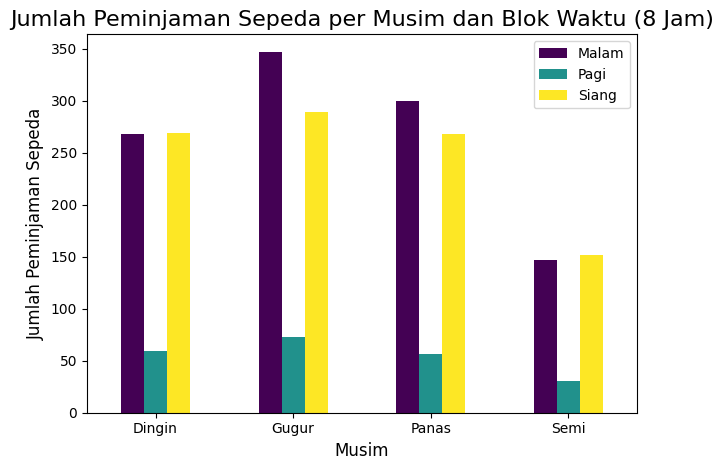

In [38]:
# Data yang diberikan
data = {
    'season': ['Dingin', 'Gugur', 'Panas', 'Semi'],
    'Malam': [267.46, 346.36, 299.77, 146.93],
    'Pagi': [59.00, 72.31, 56.83, 30.52],
    'Siang': [269.30, 288.73, 267.70, 151.71]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Set the plot size
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk peminjaman sepeda per musim dan blok waktu (8 jam)
df.set_index('season').plot(kind='bar', stacked=False, colormap='viridis')

# Memberikan judul dan label
plt.title('Jumlah Peminjaman Sepeda per Musim dan Blok Waktu (8 Jam)', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)

# Menyimpan visualisasi ke file gambar (PNG)
plt.savefig('peminjaman_per_musim_8jam.png')

# Menampilkan plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

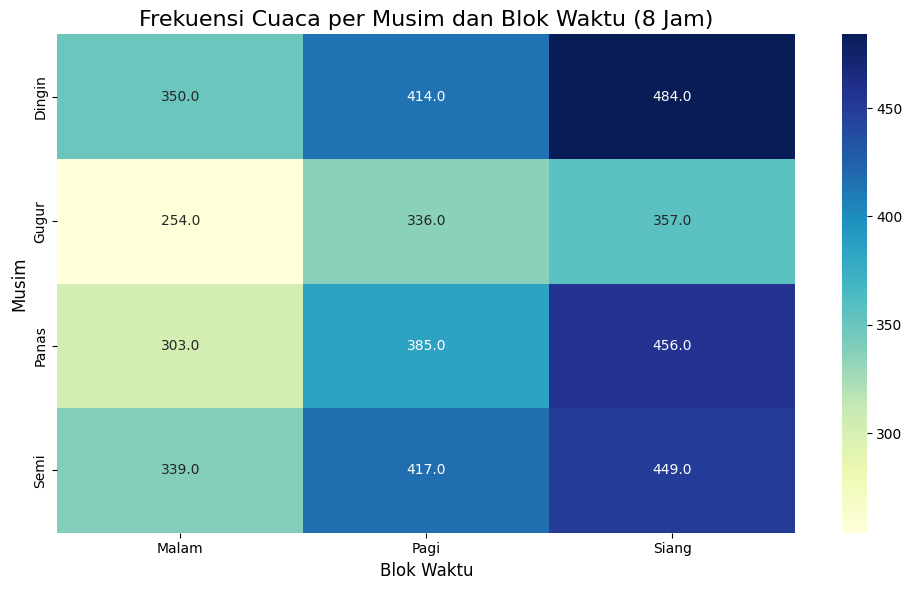

In [39]:
# Data cuaca per musim dan blok waktu 8 jam
cuaca_data = {
    'season': ['Dingin', 'Gugur', 'Panas', 'Semi'],
    'Malam': [350, 254, 303, 339],
    'Pagi': [414, 336, 385, 417],
    'Siang': [484, 357, 456, 449]
}

# Membuat DataFrame
cuaca_df = pd.DataFrame(cuaca_data)

# Set plot size
plt.figure(figsize=(10, 6))

# Membuat heatmap
sns.heatmap(cuaca_df.set_index('season'), annot=True, cmap='YlGnBu', fmt='.1f')

# Memberikan judul dan label
plt.title('Frekuensi Cuaca per Musim dan Blok Waktu (8 Jam)', fontsize=16)
plt.xlabel('Blok Waktu', fontsize=12)
plt.ylabel('Musim', fontsize=12)

# Menyimpan visualisasi ke file gambar (PNG)
plt.savefig('frekuensi_cuaca_per_musim_8jam.png')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
**Insight:**
1. Jumlah Peminjaman Sepeda per Musim dan Blok Waktu (8 Jam)
Musim Dingin memiliki penggunaan sepeda tertinggi pada siang hari (269.30), sedangkan musim Semi memiliki penggunaan sepeda terendah pada pagi hari (30.52).

    Musim Gugur menunjukkan angka penggunaan yang relatif tinggi, terutama pada malam hari (346.36), mencerminkan tingginya penggunaan sepeda pada waktu tersebut.

2. Frekuensi Cuaca per Musim dan Blok Waktu
Cuaca Cerah / Sedikit Awan adalah cuaca yang paling dominan, terlihat di semua musim dan waktu, terutama pada siang hari.

    Cuaca Berkabut / Mendung juga muncul secara signifikan pada musim Dingin dan Gugur, terutama pada pagi hari dan siang hari.

### Pertanyaan 2:

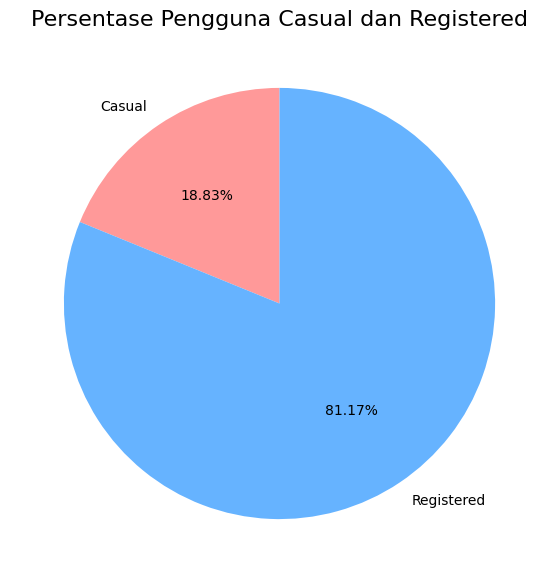

In [40]:
# Data untuk persentase pengguna casual dan registered
persentase_data = {
    'Tipe Pengguna': ['Casual', 'Registered'],
    'Persentase (%)': [18.83, 81.17]
}

# Membuat DataFrame
persentase_df = pd.DataFrame(persentase_data)

# Set plot size
plt.figure(figsize=(7, 7))

# Membuat pie chart
plt.pie(persentase_df['Persentase (%)'], labels=persentase_df['Tipe Pengguna'], autopct='%1.2f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Memberikan judul
plt.title('Persentase Pengguna Casual dan Registered', fontsize=16)

# Menyimpan visualisasi ke file gambar (PNG)
plt.savefig('persentase_pengguna_casual_vs_registered.png')

# Menampilkan plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24616\302575036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipe Libur', y='Jumlah Hari', data=libur_df, palette='viridis')


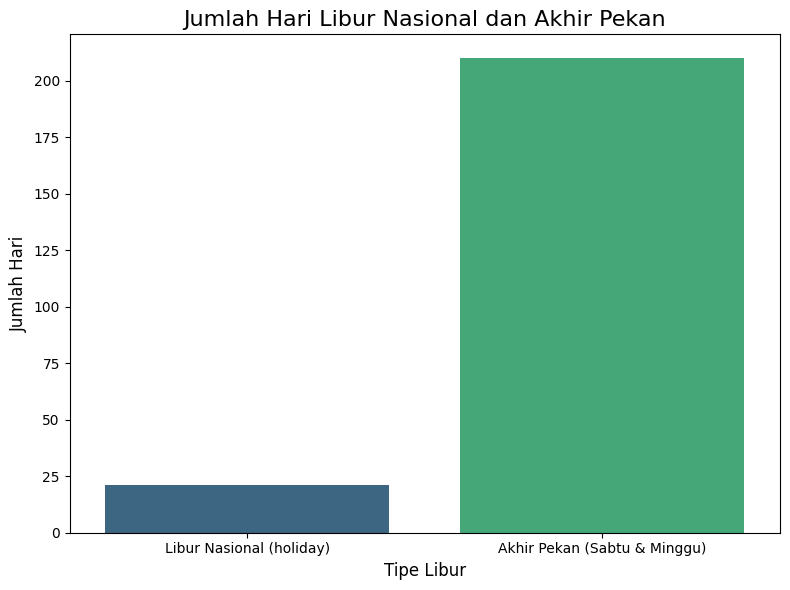

In [41]:
# Data jumlah hari libur
libur_data = {
    'Tipe Libur': ['Libur Nasional (holiday)', 'Akhir Pekan (Sabtu & Minggu)'],
    'Jumlah Hari': [21, 210]
}

# Membuat DataFrame
libur_df = pd.DataFrame(libur_data)

# Set plot size
plt.figure(figsize=(8, 6))

# Membuat bar plot
sns.barplot(x='Tipe Libur', y='Jumlah Hari', data=libur_df, palette='viridis')

# Memberikan judul dan label
plt.title('Jumlah Hari Libur Nasional dan Akhir Pekan', fontsize=16)
plt.xlabel('Tipe Libur', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)

# Menyimpan visualisasi ke file gambar (PNG)
plt.savefig('jumlah_hari_libur_nasional_vs_akhir_pekan.png')

# Menampilkan plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

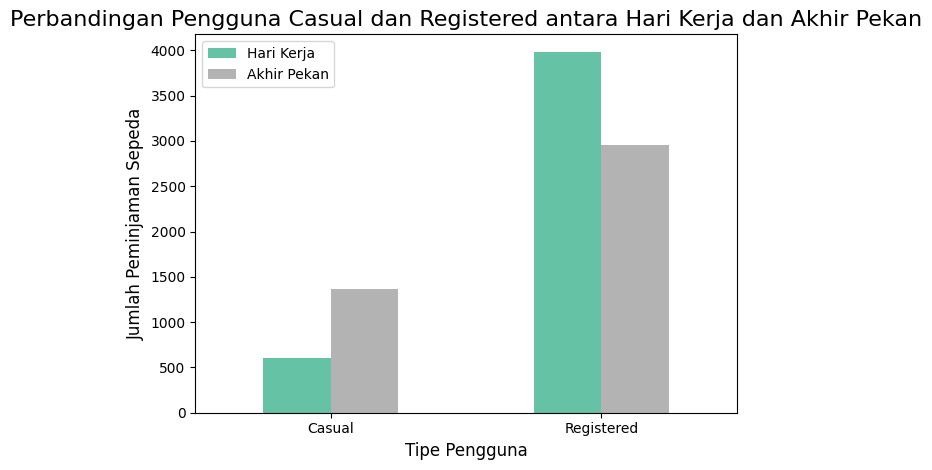

In [42]:
# Data untuk rata-rata peminjaman sepeda Casual dan Registered pada hari kerja dan akhir pekan
data_pengguna = {
    'Tipe Pengguna': ['Casual', 'Registered'],
    'Hari Kerja': [606.57, 3978.25],  # Rata-rata Casual dan Registered di Hari Kerja
    'Akhir Pekan': [1371.13, 2959.03]  # Rata-rata Casual dan Registered di Akhir Pekan
}

# Membuat DataFrame
pengguna_df = pd.DataFrame(data_pengguna)

# Set plot size
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk perbandingan peminjaman sepeda
pengguna_df.set_index('Tipe Pengguna').plot(kind='bar', stacked=False, colormap='Set2')

# Memberikan judul dan label
plt.title('Perbandingan Pengguna Casual dan Registered antara Hari Kerja dan Akhir Pekan', fontsize=16)
plt.xlabel('Tipe Pengguna', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)

# Menyimpan visualisasi ke file gambar (PNG)
plt.savefig('perbandingan_pengguna_weekend_vs_weekday.png')

# Menampilkan plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
1. Penggunaan Sepeda oleh Pengguna Casual dan Registered di Hari Libur dan Hari Kerja
Pengguna Casual memiliki rata-rata peminjaman lebih tinggi pada hari libur (1371.13), dibandingkan dengan hari kerja (606.57). Ini menunjukkan bahwa mereka lebih sering menggunakan sepeda untuk rekreasi di akhir pekan.

    Pengguna Registered cenderung lebih aktif pada hari kerja (3978.25), yang menunjukkan bahwa mereka lebih banyak menggunakan sepeda untuk keperluan rutin seperti perjalanan kerja.

2. Jumlah Hari Libur
Terdapat 21 hari libur nasional, sementara 210 hari akhir pekan (Sabtu dan Minggu). Hal ini menunjukkan bahwa akhir pekan adalah waktu yang lebih dominan bagi peminjaman sepeda dibandingkan dengan hari libur nasional.

3. Persentase Pengguna Casual dan Registered
Pengguna Registered memimpin dengan 81.17% dari total peminjaman sepeda, sementara pengguna Casual hanya menyumbang 18.83%. Ini mencerminkan bahwa pengguna yang terdaftar memiliki penggunaan sepeda yang lebih konsisten dan lebih tinggi dibandingkan dengan pengguna yang tidak terdaftar.

## Analisis Lanjutan (Opsional)

In [43]:
# Menyimpan DataFrame hour dan day ke file CSV
hour.to_csv('hour_modified.csv', index=False)
day.to_csv('day_modified.csv', index=False)

# Informasi jika file berhasil disimpan
print("Data 'hour' berhasil disimpan ke 'hour_modified.csv'")
print("Data 'day' berhasil disimpan ke 'day_modified.csv'")

Data 'hour' berhasil disimpan ke 'hour_modified.csv'
Data 'day' berhasil disimpan ke 'day_modified.csv'


## Conclusion

#### 1. Kapan Waktu Terbaik untuk Menyediakan Lebih Banyak Sepeda (Dianalisis per Musim)?

Berdasarkan hasil analisis **jumlah peminjaman sepeda per musim dan blok waktu**, berikut adalah kesimpulan:

- **Musim Gugur dan Musim Panas** merupakan musim dengan jumlah peminjaman sepeda tertinggi, terutama pada **waktu malam**.
  - **Musim Gugur** menunjukkan penggunaan sepeda yang sangat tinggi pada malam hari (**346.36 peminjaman**).
  - **Musim Panas** memiliki penggunaan tinggi pada siang hari (**267.70 peminjaman**) dan malam hari (**299.77 peminjaman**).

- **Musim Dingin** menunjukkan angka peminjaman yang lebih rendah, terutama pada pagi hari (**59.00 peminjaman**), meskipun penggunaan siang hari cukup stabil (**269.30 peminjaman**).

- **Musim Semi** adalah musim dengan peminjaman sepeda terendah, terutama pada pagi hari (**30.52 peminjaman**).

##### Kesimpulan:
- Waktu terbaik untuk menyediakan lebih banyak sepeda adalah pada **musim Gugur dan Panas**, terutama pada **waktu malam**. Pada musim tersebut, jumlah peminjaman sepeda cenderung lebih tinggi, sehingga menyediakan lebih banyak sepeda di waktu ini akan memenuhi permintaan yang lebih besar.


#### 2. Berapa rata-rata pengguna antara hari kerja dan akhir pekan/libur berdasarkan tipe pengguna (casual vs registered)??

Berdasarkan analisis **rata-rata peminjaman sepeda oleh tipe pengguna (Casual vs Registered) di hari kerja dan akhir pekan**, berikut adalah kesimpulan:

- **Pengguna Casual**:
  - Pengguna **casual** lebih banyak menggunakan sepeda pada **akhir pekan (weekend)** dengan rata-rata peminjaman **1371.13 peminjaman/hari**.
  - Pada **hari kerja**, jumlah peminjaman pengguna **casual** jauh lebih rendah (**606.57 peminjaman/hari**).

- **Pengguna Registered**:
  - Pengguna **registered** lebih banyak menggunakan sepeda pada **hari kerja** dengan rata-rata peminjaman **3978.25 peminjaman/hari**.
  - Pada **akhir pekan**, jumlah peminjaman pengguna **registered** sedikit lebih rendah (**2959.03 peminjaman/hari**).

##### Kesimpulan:
- **Pengguna Casual** lebih aktif menggunakan sepeda pada **akhir pekan**, yang menunjukkan bahwa mereka lebih banyak menggunakan sepeda untuk kegiatan rekreasi atau santai di hari libur.
- **Pengguna Registered** lebih aktif pada **hari kerja**, yang menunjukkan bahwa mereka menggunakan sepeda untuk **perjalanan rutin** seperti commuting atau keperluan sehari-hari.

##### Rekomendasi:
- Untuk **pengguna Casual**, penyediaan sepeda lebih banyak di **akhir pekan** (terutama pada hari Sabtu dan Minggu) akan lebih menguntungkan, karena mereka lebih banyak menggunakan sepeda untuk rekreasi.
- Untuk **pengguna Registered**, penyediaan sepeda yang lebih banyak pada **hari kerja**, terutama pada pagi dan sore hari, akan lebih optimal, karena mereka cenderung menggunakan sepeda untuk keperluan rutin seperti perjalanan kerja.

#### Ringkasan Jawaban:
1. **Waktu terbaik untuk menyediakan lebih banyak sepeda** adalah selama **musim Gugur dan Panas**, terutama di **waktu malam**.
2. **Pengguna Casual** lebih banyak menggunakan sepeda pada **akhir pekan**, sedangkan **pengguna Registered** lebih banyak menggunakan sepeda pada **hari kerja**.